In [49]:
import pandas as pd
import numpy as np

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
transaction_df = pd.read_csv('E:/Personl_Stuff/Documents/i2c/Assignment/transaction_data.csv')
transaction_df.head()

,transaction_id,day_of_week,transaction_type,transaction_amount,customer_id,previous_balance,new_balance,merchant_id,is_fraud
0,0,Monday,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,1
1,1,Monday,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,1
2,2,Monday,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,1
3,3,Monday,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,1
4,4,Monday,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,1


In [42]:
transaction_df.describe()

,transaction_id,transaction_amount,previous_balance,new_balance,is_fraud
count,9086.000000,9.086000e+03,9.086000e+03,9.086000e+03,9086.000000
mean,4542.500000,1.421376e+05,9.818904e+05,1.000794e+06,0.011006
std,2623.046607,2.812908e+05,2.225193e+06,2.272615e+06,0.104336
min,0.000000,3.750000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2271.250000,7.399255e+03,0.000000e+00,0.000000e+00,0.000000
50%,4542.500000,6.381883e+04,1.991050e+04,0.000000e+00,0.000000
75%,6813.750000,1.959690e+05,2.421858e+05,2.265740e+05,0.000000
max,9085.000000,1.000000e+07,1.293042e+07,1.301050e+07,1.000000


In [43]:
# Function to get summary of DataFrame
def summary_table(df):
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name', 'dtypes']]
    summary['Missing %'] = ((df.isnull().sum().values) / len(df)) * 100
    summary['Unique'] = df.nunique().values
    
    summary = summary.sort_values('Unique')
    
    return summary

In [44]:
transaction_summary_df = summary_table(transaction_df)
transaction_summary_df

,Name,dtypes,Missing %,Unique
8,is_fraud,int64,0.0,2
2,transaction_type,object,0.0,4
1,day_of_week,object,0.0,7
6,new_balance,float64,0.0,4435
7,merchant_id,object,0.0,4777
5,previous_balance,float64,0.0,6053
3,transaction_amount,float64,0.0,8974
4,customer_id,object,0.0,9027
0,transaction_id,int64,0.0,9086


### Dig Data

In [185]:
# Are there some specifc transaction amounts on which fraud is most likely
# to occur?
pd.crosstab(transaction_df['transaction_amount'], transaction_df['is_fraud']) \
.reset_index().rename(columns = {0: 'No Fraud', 1: 'Fraud'}).sort_values('Fraud', ascending=False)

is_fraud,transaction_amount,No Fraud,Fraud
8973,10000000.00,0,2
2985,13707.11,0,2
707,1996.17,0,2
3810,35063.63,0,2
3501,25071.46,0,2
3248,18627.02,0,2
1021,2806.00,0,2
3762,33332.86,0,2
4379,60726.57,0,2
3418,22877.00,0,2


In [195]:
merchant_fraud = pd.crosstab(transaction_df['merchant_id'], transaction_df['is_fraud']) \
                .reset_index().rename(columns = {0: 'No Fraud', 1: 'Fraud'}).sort_values('Fraud', ascending=False)

merchant_fraud[merchant_fraud['Fraud'] > 0]

is_fraud,merchant_id,No Fraud,Fraud
1227,C410033330,5,2
1250,C427998326,0,1
1107,C277510102,0,1
1384,C582901057,0,1
1388,C588779235,0,1
1093,C256417920,1,1
1706,C978609035,0,1
1701,C972765878,0,1
173,C118648358,1,1
178,C1191544932,0,1


## Merchant Fraud Transactions

In [239]:
merchant_transaction_amt = transaction_df[transaction_df.is_fraud == 1] \
                            .groupby(['merchant_id', 'is_fraud'])['transaction_amount'] \
                            .sum().reset_index().sort_values('transaction_amount', ascending=False)
merchant_transaction_amt_mean = merchant_transaction_amt.transaction_amount.mean()
merchant_less_mean = len(merchant_transaction_amt[merchant_transaction_amt.transaction_amount <= merchant_transaction_amt_mean])
merchant_greater_mean = len(merchant_transaction_amt) - merchant_less_mean

print("Fraud Transaction less than mean:", merchant_less_mean)
print("Fraud Transaction greater than mean:", merchant_greater_mean)

Fraud Transaction less than mean: 83
Fraud Transaction greater than mean: 16


In [240]:
merchant_transaction_amt.head(10)

,merchant_id,is_fraud,transaction_amount
95,C945327594,1,10000000.00
82,C766681183,1,10000000.00
28,C1726301214,1,5460002.91
20,C1570256460,1,5460002.91
94,C932583850,1,2930418.44
65,C449261773,1,2930418.44
2,C1013511446,1,2539898.07
73,C575638324,1,2539898.07
80,C716083600,1,1277212.77
64,C431687661,1,1277212.77


In [243]:
transaction_df[transaction_df.is_fraud == 1].groupby(['customer_id', 'is_fraud'])\
['previous_balance'].sum().reset_index().sort_values('previous_balance')

,customer_id,is_fraud,previous_balance
2,C1026280121,1,0.00
89,C749981943,1,0.00
57,C2102265902,1,0.00
7,C1173659886,1,164.00
28,C1455969984,1,164.00
94,C840083671,1,181.00
15,C1305486145,1,181.00
49,C1961506277,1,222.00
40,C1737727444,1,222.00
96,C858959216,1,1996.17


## Verify New_Balance after Transaction

In [262]:
transaction_df['new_verified_balance'] = transaction_df.previous_balance - transaction_df.transaction_amount
transaction_df['new_verified_balance'].head()

0         0.00
1         0.00
2         0.00
3   -416001.33
4         0.00
Name: new_verified_balance, dtype: float64

- Almost half of the transactions are done by customers who have negative balance which means they are using CREDIT_CARD and they have no balance in their CREDIT_CARD while doing transaction.

- Transaction type of CREDIT_CARD guys ?
- How negative balance related to Fraud ?


- new_balance in original dataset is not correct .... PROBLEM ???????

In [293]:
total_transactions = len(transaction_df)
total_fraud_transactions = len(transaction_df[transaction_df.is_fraud == 1])

negative_balance_transactions = transaction_df[transaction_df.new_verified_balance < 0]
negative_balance_transactions_percent = round((len(negative_balance_transactions) / total_transactions) * 100, 2)

positive_balance_transactions = transaction_df[transaction_df.new_verified_balance >= 0]
positive_balance_transactions_percent = round(len(positive_balance_transactions) / total_transactions * 100, 2)

negative_balance_fraud_transactions = negative_balance_transactions[negative_balance_transactions.is_fraud == 1]
negative_balance_fraud_transactions_percent = round(len(negative_balance_fraud_transactions)
                                               / total_fraud_transactions * 100, 2)

positive_balance_fraud_transactions = positive_balance_transactions[positive_balance_transactions.is_fraud == 1]
positive_balance_fraud_transactions_percent = round(len(positive_balance_fraud_transactions)
                                               / total_fraud_transactions * 100, 2)


positive_balance_frauds = (transaction_df.new_verified_balance >= 0) & (transaction_df.is_fraud == 1)
negative_balance_frauds = (transaction_df.new_verified_balance < 0) & (transaction_df.is_fraud == 1)

positive_cash_transactions = round(len(transaction_df[positive_balance_frauds & 
                                                (transaction_df.transaction_type == 'CASH_OUT')])
                                   / len(positive_balance_fraud_transactions) * 100, 2)
positive_transfer_transactions = round(len(transaction_df[positive_balance_frauds & 
                                                (transaction_df.transaction_type == 'TRANSFER')])
                                   / len(positive_balance_fraud_transactions) * 100, 2)

negative_cash_transactions = round(len(transaction_df[negative_balance_frauds & 
                                                (transaction_df.transaction_type == 'CASH_OUT')])
                                   / len(negative_balance_fraud_transactions) * 100, 2)
negative_transfer_transactions = round(len(transaction_df[negative_balance_frauds & 
                                                (transaction_df.transaction_type == 'TRANSFER')])
                                   / len(negative_balance_fraud_transactions) * 100, 2)


print("Transactions with negative new_balance: {}%".format(negative_balance_transactions_percent))
print("Transactions with positive new_balance: {}%".format(positive_balance_transactions_percent))
print("Fraud transactions with negative new_balance: {}%".format(negative_balance_fraud_transactions_percent))
print("Fraud transactions with positive new_balance: {}%".format(positive_balance_fraud_transactions_percent))
print("Fraud transactions with positive new_balance and transaction_type(CASH_OUT): {}" \
      .format(positive_cash_transactions))
print("Fraud transactions with positive new_balance and transaction_type(TRANSFER): {}" \
      .format(positive_transfer_transactions))
print("Fraud transactions with negative new_balance and transaction_type(CASH_OUT): {}" \
      .format(negative_cash_transactions))
print("Fraud transactions with negative new_balance and transaction_type(TRANSFER): {}" \
      .format(negative_transfer_transactions))

Transactions with negative new_balance: 51.09%
Transactions with positive new_balance: 48.91%
Fraud transactions with negative new_balance: 4.0%
Fraud transactions with positive new_balance: 96.0%
Fraud transactions with positive new_balance and transaction_type(CASH_OUT): 48.96
Fraud transactions with positive new_balance and transaction_type(TRANSFER): 51.04
Fraud transactions with negative new_balance and transaction_type(CASH_OUT): 75.0
Fraud transactions with negative new_balance and transaction_type(TRANSFER): 25.0


In [47]:
pd.crosstab(transaction_df['transaction_type'], transaction_df['is_fraud'], normalize='index') * 100

is_fraud,0,1
transaction_type,,
CASH_IN,100.000000,0.000000
CASH_OUT,98.437500,1.562500
PAYMENT,100.000000,0.000000
TRANSFER,93.742178,6.257822


In [224]:
transaction_df[transaction_df.is_fraud == 1][['transaction_amount', 'merchant_id']]

,transaction_amount,merchant_id
0,181.00,C38997010
1,2806.00,C1007251739
2,20128.00,C339924917
3,416001.33,C667346055
4,1277212.77,C716083600
5,35063.63,C1983025922
6,25071.46,C1364913072
7,132842.64,C297927961
8,235238.66,C2100440237
9,1096187.24,C644345897


# Exploratory Data Analysis

## Target Distribution

[8986, 100]


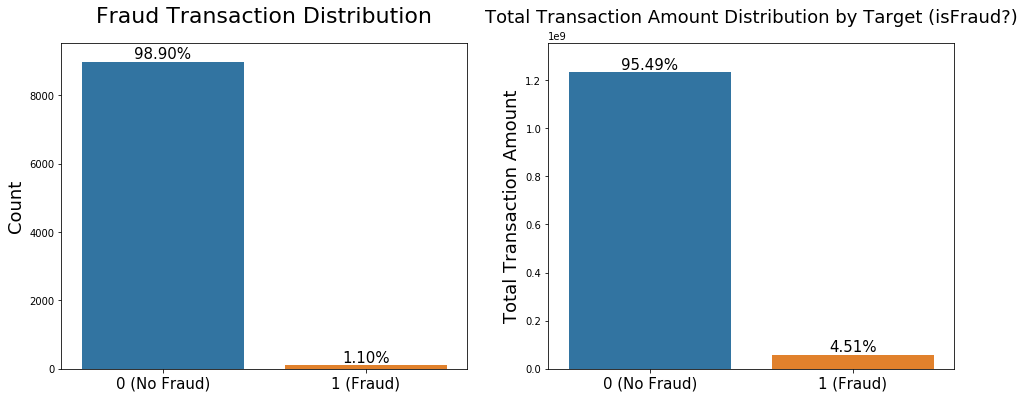

In [57]:


total_amt = transaction_df['transaction_amount'].sum()
total = len(transaction_df)

total_amt_by_target = transaction_df.groupby(['is_fraud'])['transaction_amount'].sum().reset_index()

plt.figure(figsize=(16,6))

# no.of rows, no. of cols, plot_no
plt.subplot(121)

ax = sns.countplot(x='is_fraud', data=transaction_df)

ax.set_title("Fraud Transaction Distribution", fontsize=22, pad=20.0)
ax.set_xlabel('')
ax.set_ylabel('Count', fontsize=18)
ax.set_ylim(0, total * 0.05 + total)
ax.set_xticklabels(['0 (No Fraud)', '1 (Fraud)'], fontsize=15)

h_lst = [p.get_height() for p in ax.patches]
pad = max(h_lst) * 0.01

print(h_lst)
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):
        continue
    ax.text(p.get_x() + p.get_width() / 2.0,
            height + pad,
            '{:1.2f}%'.format(height / total * 100),
            ha="center", fontsize=15)
    
plt.subplot(122)

ax1 = sns.barplot(x='is_fraud', y='transaction_amount', data=total_amt_by_target)

ax1.set_title("Total Transaction Amount Distribution by Target (isFraud?)", fontsize=18, pad=20.0)
ax1.set_xlabel('')
ax1.set_ylabel('Total Transaction Amount', fontsize=18)
ax1.set_ylim(0, total_amt * 0.05 + total_amt)
ax1.set_xticklabels(['0 (No Fraud)', '1 (Fraud)'], fontsize=15)

h_lst = [p.get_height() for p in ax1.patches]
pad = max(h_lst) * 0.01

for p in ax1.patches:
    height = p.get_height()
    if np.isnan(height):
        continue
    ax1.text(p.get_x() + p.get_width() / 2.0,
             height + pad,
             '{:1.2f}%'.format(height / total_amt * 100),
             ha="center", fontsize=15)

plt.show()

## Transaction Amount Quantiles

In [173]:
print("Transaction Amount Quantiles")
print(transaction_df['transaction_amount'].quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99]))

Transaction Amount Quantiles
0.010    2.605640e+02
0.025    6.248588e+02
0.100    2.466125e+03
0.250    7.399255e+03
0.500    6.381883e+04
0.750    1.959690e+05
0.900    3.436340e+05
0.975    6.118215e+05
0.990    1.156502e+06
Name: transaction_amount, dtype: float64


## Plotting Transaction Amount Distribution

C:\Users\VenD\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


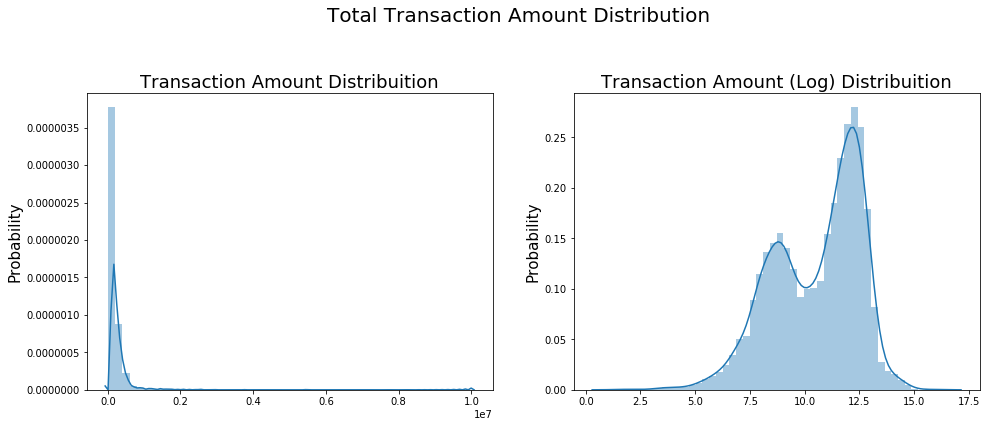

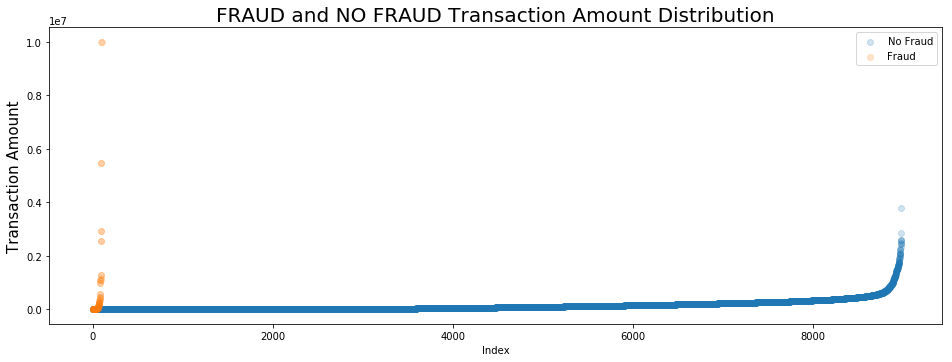

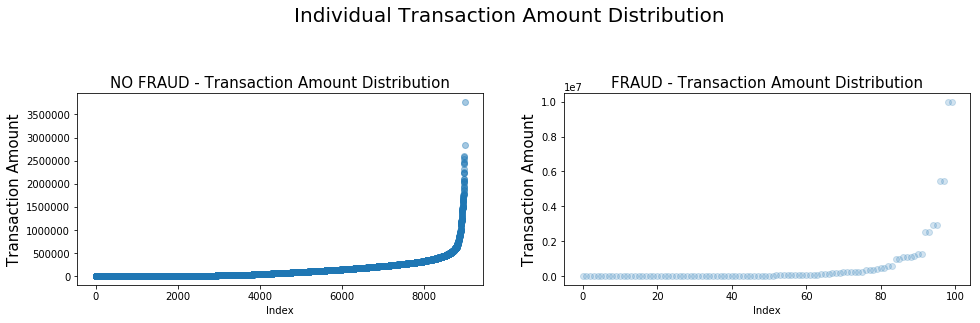

In [175]:
# First Figure
plt.figure(figsize=(16, 12))
plt.suptitle("Total Transaction Amount Distribution", fontsize=20)

plt.subplot(221)
ax1 = sns.distplot(transaction_df['transaction_amount'])
ax1.set_title("Transaction Amount Distribuition", fontsize=18)
ax1.set_xlabel("")
ax1.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
ax2 = sns.distplot(np.log(transaction_df['transaction_amount']))
ax2.set_title("Transaction Amount (Log) Distribuition", fontsize=18)
ax2.set_xlabel("")
ax2.set_ylabel("Probability", fontsize=15)

# 2nd Figure
plt.figure(figsize=(16,12))

plt.subplot(211)
no_fraud_transaction_list = range(transaction_df[transaction_df['is_fraud'] == 0].shape[0])
no_fraud_transaction_amt = np.sort(transaction_df[transaction_df['is_fraud'] == 0]['transaction_amount'].values)
fraud_transaction_list = range(transaction_df[transaction_df['is_fraud'] == 1].shape[0])
fraud_transaction_amt = np.sort(transaction_df[transaction_df['is_fraud'] == 1]['transaction_amount'].values)

ax3 = plt.scatter(no_fraud_transaction_list, no_fraud_transaction_amt, label='No Fraud', alpha=.2)
ax3 = plt.scatter(fraud_transaction_list, fraud_transaction_amt, label='Fraud', alpha=.2)
ax3 = plt.title("FRAUD and NO FRAUD Transaction Amount Distribution", fontsize=20)
ax3 = plt.xlabel("Index")
ax3 = plt.ylabel("Transaction Amount", fontsize=15)
ax3 = plt.legend()

# 3rd Figure
plt.figure(figsize=(16, 12))

plt.suptitle("Individual Transaction Amount Distribution", fontsize=20)

plt.subplot(321)
ax4 = plt.scatter(no_fraud_transaction_list, no_fraud_transaction_amt, label='No Fraud', alpha=.4)
ax4 = plt.title("NO FRAUD - Transaction Amount Distribution", fontsize=15)
ax4 = plt.xlabel("Index")
ax4 = plt.ylabel("Transaction Amount", fontsize=15)

plt.subplot(322)
ax5 = plt.scatter(fraud_transaction_list, fraud_transaction_amt, label='Fraud', alpha=.2)
ax5 = plt.title("FRAUD - Transaction Amount Distribution", fontsize=15)
ax5 = plt.xlabel("Index")
ax5 = plt.ylabel("Transaction Amount", fontsize=15)

plt.show()

## Outliers 

- Trasaction Amount have outliers in case of both Fraud and No Fraud Transactions but we are not sure whether it is due to Data Entry errors, Data processing errors or they are intentional or natural outliers so just removing them now does not make sense before having rich business knowledge.

## Qunatiles of Fraud and No Fraud Transactions

In [177]:
fraud_transaction_quantile = transaction_df[transaction_df['is_fraud'] == 1]['transaction_amount'] \
                             .quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99]).reset_index()

no_fraud_transaction_quantile = transaction_df[transaction_df['is_fraud'] == 0]['transaction_amount'] \
                             .quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99]).reset_index()

transaction_quantile_df = pd.concat([fraud_transaction_quantile, no_fraud_transaction_quantile],
                                    axis=1, keys=['Fraud', 'No Fraud'])

In [178]:
transaction_quantile_df

Fraud                    No Fraud                   
   index transaction_amount    index transaction_amount
0  0.010       1.640000e+02    0.010       2.667180e+02
1  0.025       1.810000e+02    0.025       6.341625e+02
2  0.100       9.388123e+03    0.100       2.460295e+03
3  0.250       1.494984e+04    0.250       7.317400e+03
4  0.500       3.192694e+04    0.500       6.422158e+04
5  0.750       2.624345e+05    0.750       1.952450e+05
6  0.900       1.166640e+06    0.900       3.420672e+05
7  0.975       5.460003e+06    0.975       6.010754e+05
8  0.990       1.000000e+07    0.990       1.042137e+06

## Previous_Balance, New_Balance Distributions

C:\Users\VenD\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


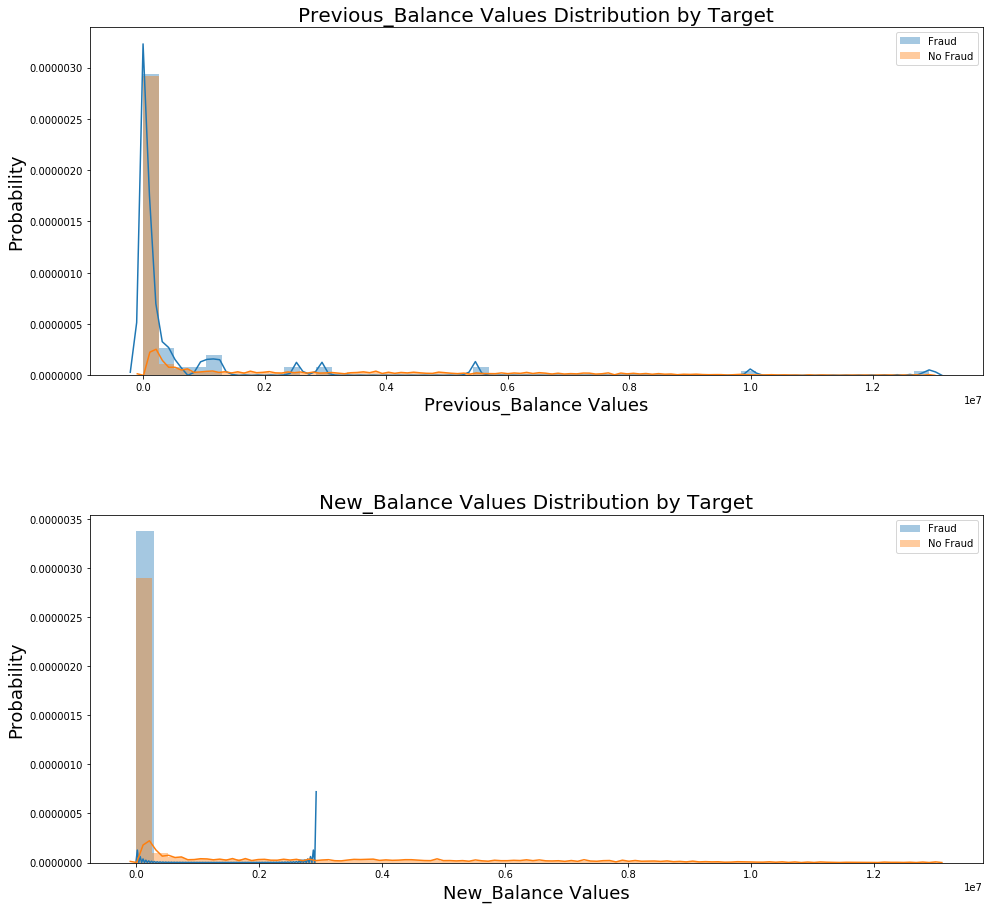

In [184]:
plt.figure(figsize=(16,16))

plt.subplot(211)
ax1 = sns.distplot(transaction_df[transaction_df['is_fraud'] == 1]['previous_balance'], label='Fraud')
ax1 = sns.distplot(transaction_df[transaction_df['is_fraud'] == 0]['previous_balance'], label='No Fraud')
ax1.legend()
ax1.set_title('Previous_Balance Values Distribution by Target', fontsize=20)
ax1.set_xlabel('Previous_Balance Values', fontsize=18)
ax1.set_ylabel('Probability', fontsize=18)

plt.subplot(212)
ax2 = sns.distplot(transaction_df[transaction_df['is_fraud'] == 1]['new_balance'].dropna(), label='Fraud')
ax2 = sns.distplot(transaction_df[transaction_df['is_fraud'] == 0]['new_balance'].dropna(), label='No Fraud')
ax2.legend()
ax2.set_title('New_Balance Values Distribution by Target', fontsize=20)
ax2.set_xlabel('New_Balance Values', fontsize=18)
ax2.set_ylabel('Probability', fontsize=18)
    
plt.subplots_adjust(hspace = 0.4, top = 0.85)

plt.show()

## Transaction Type

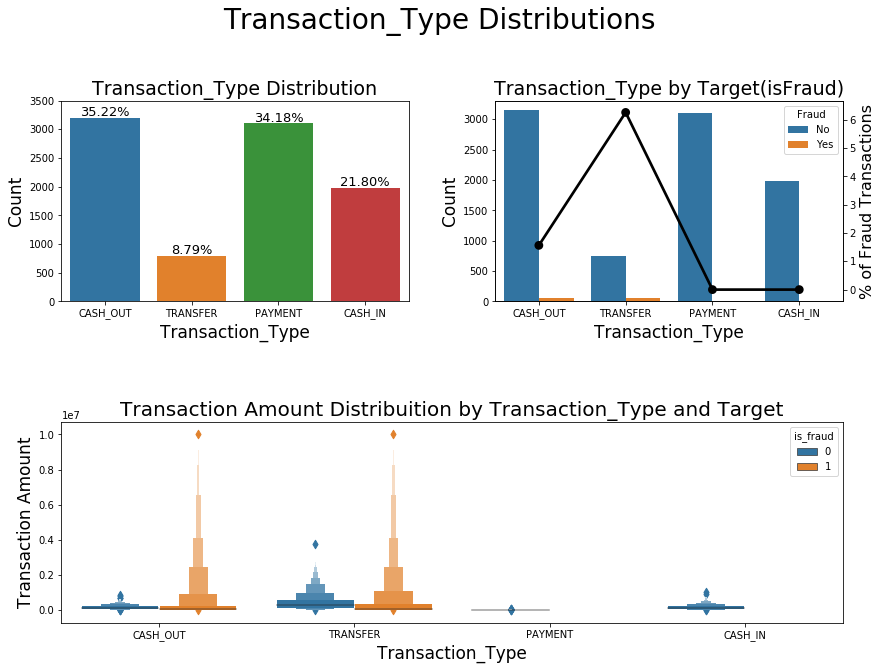

In [96]:
transaction_type_target_df = pd.crosstab(transaction_df['transaction_type'], 
                                         transaction_df['is_fraud'], 
                                         normalize='index') * 100
transaction_type_target_df = transaction_type_target_df.reset_index()
transaction_type_target_df = transaction_type_target_df.rename(columns = {0: 'No Fraud', 1: 'Fraud'})

total = len(transaction_df)

plt.figure(figsize=(14, 10))
plt.suptitle('Transaction_Type Distributions', fontsize=28)

plt.subplot(221)
ax1 = sns.countplot(x='transaction_type', data=transaction_df)
ax1.set_title('Transaction_Type Distribution', fontsize=19)
ax1.set_xlabel('Transaction_Type', fontsize=17)
ax1.set_ylabel('Count', fontsize=17)
ax1.set_ylim(0, 3500)

h_lst = [p.get_height() for p in ax1.patches]
pad = max(h_lst) * 0.01

for p in ax1.patches:
    height = p.get_height()
    if np.isnan(height):
        continue
    ax1.text(p.get_x() + p.get_width() / 2.0,
             height + pad,
             '{:1.2f}%'.format(height / total * 100),
             ha="center", fontsize=13)
    
plt.subplot(222)
ax2 = sns.countplot(x='transaction_type', hue='is_fraud', data=transaction_df)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])

ax2_twin = ax2.twinx()
ax2_twin = sns.pointplot(x='transaction_type', y='Fraud', 
                         data=transaction_type_target_df, 
                         color='black',
                         order=['CASH_OUT', 'TRANSFER', 'PAYMENT', 'CASH_IN'],
                         legend=False)
ax2_twin.set_ylabel('% of Fraud Transactions', fontsize=16)

ax2.set_title('Transaction_Type by Target(isFraud)', fontsize=19)
ax2.set_xlabel('Transaction_Type', fontsize=17)
ax2.set_ylabel('Count', fontsize=17)

plt.subplot(212)
ax3 = sns.boxenplot(x='transaction_type', y='transaction_amount', hue='is_fraud', 
                    data=transaction_df)
ax3.set_title('Transaction Amount Distribuition by Transaction_Type and Target', fontsize=20)
ax3.set_xlabel('Transaction_Type', fontsize=17)
ax3.set_ylabel('Transaction Amount', fontsize=17)

plt.subplots_adjust(hspace=0.6, wspace=0.25, top=0.85)

plt.show()

- Boxenplot showing some of the Fraud Transaction amount is very very large as compare to non-fradulent transactions.
- Boxenplot shows how many transactions (fraud / non-fraud) are for a specific transaction amount.
- Too much high amount for Fraud Transactions could be outliers as well (but not sure).

In [124]:
def plot_category_count_and_amount_by_fraud_percent(df, col):
    total = len(df)
    total_amt = df['transaction_amount'].sum()
    
    tmp = pd.crosstab(df[col], df['is_fraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0: 'No Fraud', 1: 'Fraud'}, inplace=True)
    
    percent_amt = ((df.groupby(['is_fraud', col])['transaction_amount'].sum() / 
                    df.groupby([col])['transaction_amount'].sum()) * 100).unstack('is_fraud')
    
    percent_amt = percent_amt.reset_index()
    percent_amt.rename(columns={0: 'No Fraud', 1: 'Fraud'}, inplace=True)
    percent_amt = percent_amt.fillna(0)
    total_amt_by_category = df.groupby([col])['transaction_amount'].sum().reset_index()
    
    plt.figure(figsize=(16, 14))
    plt.suptitle(f'{col} Distributions', fontsize=24)
    
    # plot 1
    plt.subplot(211)
    ax1 = sns.countplot(x=col, data=df, order=list(tmp[col].values))
    ax1.set_title(f'{col} Distribution\nCount and %Fraud by each category', fontsize=18)
    ax1.set_xlabel(f'{col} Category Name', fontsize=14)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    ax1.set_ylabel('Count', fontsize=14)
    
    # plot fraud transaction and set only y-axis    
    ax1_twin = ax1.twinx()
    ax1_twin = sns.pointplot(x=col, y='Fraud', data=tmp, 
                             order=list(tmp[col].values),
                             color='black', legend=False)
    ax1_twin.set_ylabel('% of Fraud Transactions', fontsize=14)
    ax1_twin.set_ylim(0, tmp['Fraud'].max() * 1.1)
 
    # set percentages for each bar in graph
    ax1_sizes = []
    
    h_lst = [p.get_height() for p in ax1.patches]
    pad = max(h_lst) * 0.01

    for p in ax1.patches:
        height = p.get_height()
        if np.isnan(height):
            continue
        ax1_sizes.append(height)
        ax1.text(p.get_x() + p.get_width() / 2.0,
                 height + pad,
                 '{:1.2f}%'.format(height / total * 100),
                 ha="center", fontsize=12)
    
    ax1.set_ylim(0, max(ax1_sizes) * 1.15)
    
    # plot 2
    plt.subplot(212)
    ax2 = sns.barplot(x=col, y='transaction_amount', 
                      data=total_amt_by_category, 
                      order=list(tmp[col].values))
    
    ax2.set_title(f'{col} by Transactions Total + %of total and %Fraud Transactions', fontsize=18)
    ax2.set_xlabel(f'{col} Category Name', fontsize=14)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
    ax2.set_ylabel('Transaction Total Amount', fontsize=14)
    
    # plot fraud transaction amount and set only y-axis
    ax2_twin = ax2.twinx()
    ax2_twin = sns.pointplot(x=col, y='Fraud', data=percent_amt, 
                             order=list(tmp[col].values),
                             color='black', legend=False)
    ax2_twin.set_ylabel('%Fraud Total Amount', fontsize=14)
    ax2_twin.set_ylim(0, percent_amt['Fraud'].max() * 1.1)
    
    # set percentages for each bar in graph
    ax2_sizes = []
    
    h_lst = [p.get_height() for p in ax2.patches]
    pad = max(h_lst) * 0.01
    
    for p in ax2.patches:
        height = p.get_height()
        if np.isnan(height):
            continue
        ax2_sizes.append(height)
        ax2.text(p.get_x() + p.get_width() / 2.0,
                 height + pad,
                 '{:1.2f}%'.format(height / total_amt * 100),
                 ha="center", fontsize=12)
    
    plt.subplots_adjust(hspace=.4, top = 0.9)
    
    plt.show()

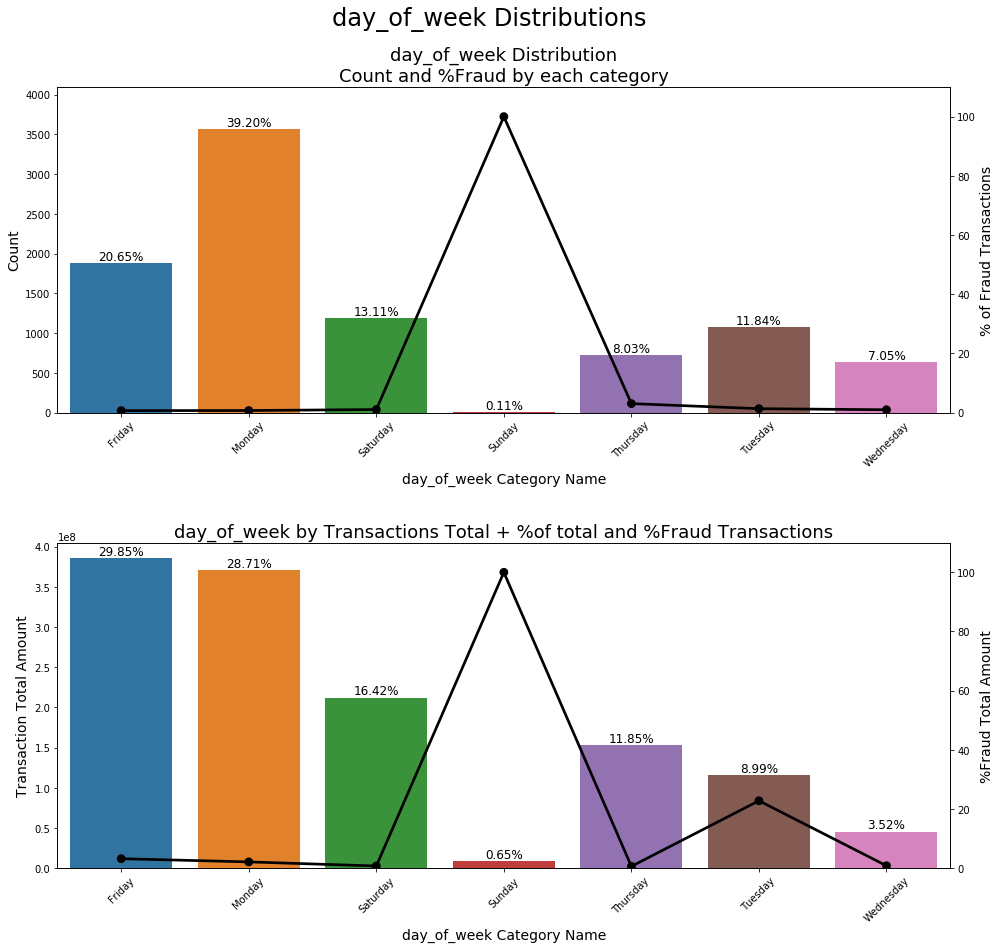

In [125]:
plot_category_count_and_amount_by_fraud_percent(transaction_df, 'day_of_week')

In [324]:
# Transactions Type on Week days ???????
# Saturday and Sunday are interesting so will include them in ---> Hypothesis

transaction_type_by_week_days = pd.crosstab(transaction_df['day_of_week'], 
                                            transaction_df['transaction_type'], normalize='index') * 100
transaction_type_by_week_days

transaction_type,CASH_IN,CASH_OUT,PAYMENT,TRANSFER
day_of_week,,,,
Friday,29.850746,61.567164,0.000000,8.582090
Monday,20.494104,13.812465,55.670971,10.022459
Saturday,0.000000,99.496222,0.000000,0.503778
Sunday,0.000000,40.000000,0.000000,60.000000
Thursday,41.095890,23.835616,12.876712,22.191781
Tuesday,24.163569,11.988848,56.691450,7.156134
Wednesday,20.436817,9.516381,65.366615,4.680187


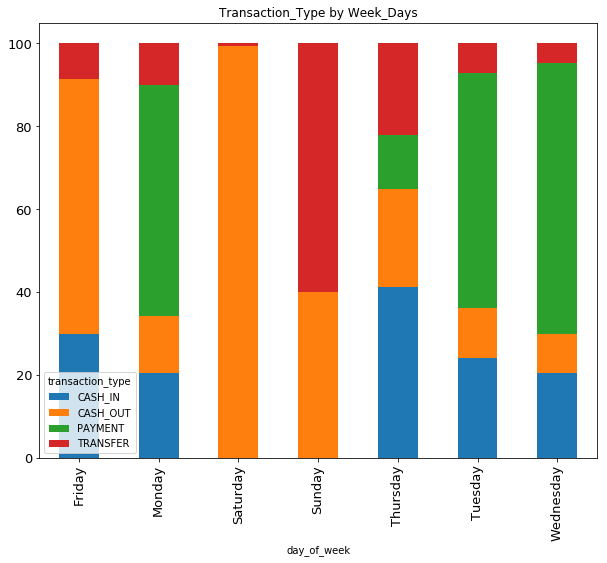

In [325]:
transaction_type_by_week_days.plot(kind='bar', stacked=True, figsize=(10, 8), 
                                   title='Transaction_Type by Week_Days', fontsize=13)

In [327]:
# Previous Balance binning and check with Fraud Transactions ????????
pd.crosstab(transaction_df['previous_balance_binned'], transaction_df['is_fraud'], normalize='index') * 100

is_fraud,0,1
previous_balance_binned,,
"(-12930.418, 1293041.844]",98.761943,1.238057
"(1293041.844, 2586083.688]",99.416910,0.583090
"(2586083.688, 3879125.532]",99.356913,0.643087
"(3879125.532, 5172167.376]",100.000000,0.000000
"(5172167.376, 6465209.22]",99.134199,0.865801
"(6465209.22, 7758251.064]",100.000000,0.000000
"(7758251.064, 9051292.908]",100.000000,0.000000
"(9051292.908, 10344334.752]",98.648649,1.351351
"(10344334.752, 11637376.596]",100.000000,0.000000
